In [29]:
## 1. Data Loading & Overview

In [30]:
import warnings
warnings.filterwarnings("ignore")


In [31]:
import pandas as pd 
df = pd.read_csv("C:/Users/shreshtha/Downloads/archive/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [32]:
df.shape 

(12330, 18)

In [33]:
df.columns


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [34]:
df['Revenue'].value_counts()


Revenue
False    10422
True      1908
Name: count, dtype: int64

In [35]:
df['Revenue'].value_counts(normalize=True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

In [36]:
df.groupby('Revenue')['ProductRelated'].mean()

Revenue
False    28.714642
True     48.210168
Name: ProductRelated, dtype: float64

In [37]:
df.groupby('Revenue')['ProductRelated_Duration'].mean()


Revenue
False    1069.987809
True     1876.209615
Name: ProductRelated_Duration, dtype: float64

In [38]:
df.groupby('Revenue')['BounceRates'].mean()

Revenue
False    0.025317
True     0.005117
Name: BounceRates, dtype: float64

In [39]:
df.groupby('Revenue')['ExitRates'].mean()

Revenue
False    0.047378
True     0.019555
Name: ExitRates, dtype: float64

In [40]:
## 2. Exploratory Data Analysis

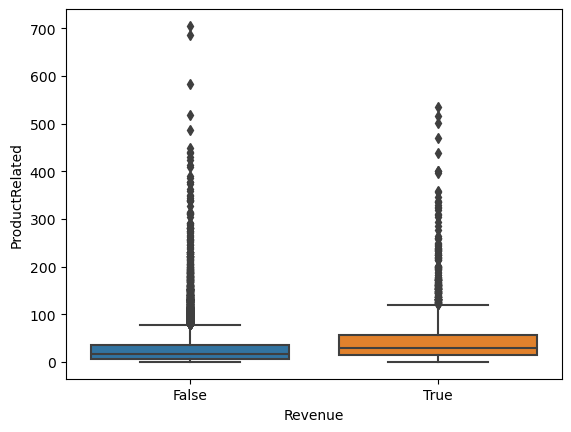

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Revenue', y='ProductRelated', data=df)
plt.show()

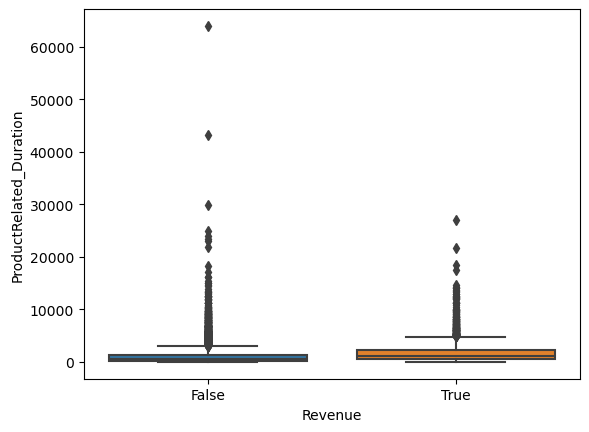

In [42]:
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.show()

In [43]:
df.groupby('VisitorType')['Revenue'].mean()


VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: Revenue, dtype: float64

In [44]:
df['ProductRelated_Duration'].median()


598.9369047499999

In [45]:
total_sessions = len(df)
product_discovery = (df['ProductRelated'] > 0).sum()
deep_engagement = (df['ProductRelated_Duration'] > 598.94).sum()
purchases = (df['Revenue'] == True).sum()

total_sessions, product_discovery, deep_engagement, purchases


(12330, 12292, 6165, 1908)

In [46]:
## 3. Funnel Analysis

In [47]:
funnel_df = pd.DataFrame({
    'Stage': [
        'Session Started',
        'Product Discovery',
        'Deep Engagement',
        'Purchase'
    ],
    'Users': [
        total_sessions,
        product_discovery,
        deep_engagement,
        purchases
    ]
})

funnel_df


,Stage,Users
0,Session Started,12330
1,Product Discovery,12292
2,Deep Engagement,6165
3,Purchase,1908


In [48]:
funnel_df['Conversion_%'] = funnel_df['Users'] / funnel_df['Users'].iloc[0] * 100
funnel_df


,Stage,Users,Conversion_%
0,Session Started,12330,100.000000
1,Product Discovery,12292,99.691809
2,Deep Engagement,6165,50.000000
3,Purchase,1908,15.474453


In [49]:
### 🔻 Funnel Analysis Insight
#The largest drop-off occurs between product discovery and deep engagement, suggesting users lose intent before fully evaluating products.


In [50]:
funnel_df.to_csv("funnel_data.csv", index=False)
print("File saved successfully")



File saved successfully


In [51]:
funnel_df.to_csv(
    r"C:\Users\shreshtha\Downloads\funnel_data.csv",
    index=False
)
print("Saved to Downloads")


Saved to Downloads


In [52]:
## 4. Engagement Segmentation

In [53]:
behavior_df = (
    df.groupby('Revenue')
      .agg({
          'ProductRelated': 'mean',
          'ProductRelated_Duration': 'mean',
          'BounceRates': 'mean',
          'ExitRates': 'mean'
      })
      .reset_index()
)

behavior_df



,Revenue,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
0,False,28.714642,1069.987809,0.025317,0.047378
1,True,48.210168,1876.209615,0.005117,0.019555


In [ ]:
### 🎯 Engagement Segmentation Insight
Conversion rate increases sharply with engagement depth, validating engagement as a strong proxy for purchase intent.


In [54]:

behavior_df.to_csv(
    r"C:\Users\shreshtha\Downloads\behavior_summary.csv",
    index=False
)
print("Saved to Downloads")


Saved to Downloads


In [55]:
## 5. Engagement Segmentation


In [56]:
df['Engagement_Level'] = pd.qcut(
    df['ProductRelated_Duration'],
    q=3,
    labels=['Low Engagement', 'Medium Engagement', 'High Engagement']
)

segment_df = (
    df.groupby('Engagement_Level')
      .agg({
          'Revenue': 'mean',
          'ProductRelated_Duration': 'mean'
      })
      .reset_index()
)

segment_df



,Engagement_Level,Revenue,ProductRelated_Duration
0,Low Engagement,0.054015,108.857199
1,Medium Engagement,0.174939,627.175891
2,High Engagement,0.235280,2848.205570


In [57]:

segment_df.to_csv(
    r"C:\Users\shreshtha\Downloads\engagement_segments.csv",
    index=False
)
print("Saved to Downloads")

Saved to Downloads


In [58]:
context_df = (
    df.groupby(['VisitorType', 'Weekend', 'Month'])
      .agg({'Revenue': 'mean'})
      .reset_index()
)

context_df


,VisitorType,Weekend,Month,Revenue
0,New_Visitor,False,Aug,0.395833
1,New_Visitor,False,Dec,0.234848
2,New_Visitor,False,Feb,0.000000
3,New_Visitor,False,Jul,0.195122
4,New_Visitor,False,June,0.291667
5,New_Visitor,False,Mar,0.170213
6,New_Visitor,False,May,0.277778
7,New_Visitor,False,Nov,0.311644
8,New_Visitor,False,Oct,0.250000
9,New_Visitor,False,Sep,0.232558


In [ ]:
## ✅ Key Takeaways

- Overall conversion rate is ~15%
- Major drop-off occurs before deep engagement
- Buyers explore more products and spend more time
- Engagement depth strongly correlates with conversion
- High-engagement users represent the biggest optimization opportunity
